# Using LeNet-5 For MNIST (Keras)

As an initial way to get my feet wet with implementing CNNs, I want to try out a few different frameworks to recognize the hand written digits from the MNIST dataset. I have used Keras in the past and it is extremely simple to use, providing a way to train neural nets with incredibly little code. It is thus not the best for customizing the intracies of the model, but is a good place to start.

In [ ]:
# Important! If not done, the GPU memory stays high and tensorflow due to OOM
from keras import backend as K
K.clear_session()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [3]:
# keras provides ways to load the data using this simple call
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Training examples: 60000
Testing examples: 10000
Train/Test split: 85.71/14.29


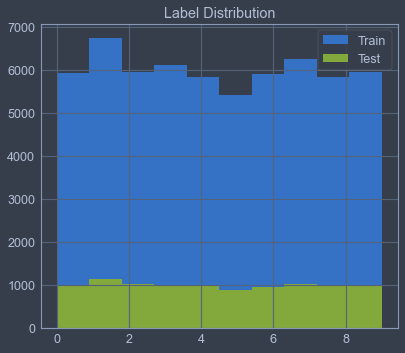

In [4]:
# Exploring some of the data
print("Training examples: %s"%len(x_train))
print("Testing examples: %s"%len(x_test))
print("Train/Test split: %0.2f/%0.2f"%(100*len(x_train)/(len(x_train) + len(x_test)), 100*len(x_test)/(len(x_train) + len(x_test))))
_ = plt.hist(y_train)
plt.title("Label Distribution")
_ = plt.hist(y_test)
plt.legend(["Train", "Test"])

In [5]:
assert len(x_train) == len(y_train)

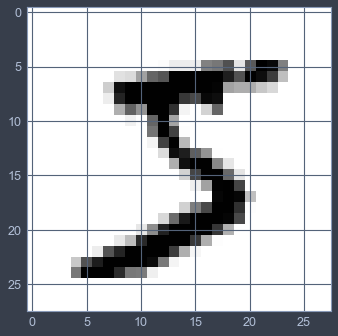

In [6]:
x_example = x_train[0] 
_ = plt.imshow(x_example, cmap='binary')

Text(0.5, 1.0, 'Range within single image')

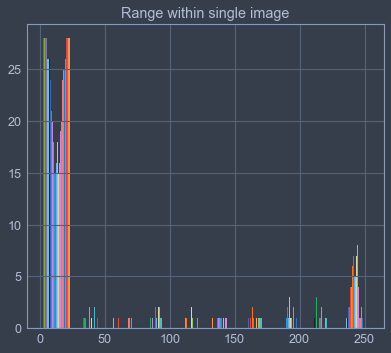

In [7]:
_ = plt.hist(x_example)
plt.title("Range within single image")

In [8]:
# Normalize to range [0-1]
x_train = x_train.astype('float')
x_train /= 255
x_test = x_test.astype('float')
x_test /= 255

# Shape the data into a tensor, with 4th dimension being 1
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

In [9]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
# Want to tranform to one-hot encoding: array with a 1 in the position of the label
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Defining the Model

In [12]:
from keras.models import Sequential
from keras import models, layers
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
import keras

# Make sure GPU is detected
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2318686411357307184
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9204972913
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12687717074125499707
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [14]:
?Conv2D

In [15]:
?AveragePooling2D

In [13]:
model = Sequential()

# Conv
model.add(Conv2D(6, (5,5), strides=(1,1), activation="tanh", input_shape=(28,28,1), padding="same"))
# Average Pool
model.add(AveragePooling2D(pool_size=(2,2), strides=(1,1)))
# Conv
model.add(Conv2D(16, (5,5), strides=(1,1), activation="tanh"))
# Average Pool
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
# Conv
model.add(Conv2D(120, kernel_size=(5,5), strides=(1,1), activation="tanh"))
# Flatten from here to prepare data for fully conncted
model.add(Flatten())
# Fully connected
model.add(Dense(84, activation="tanh"))
# Output layer, use softmax to get to a valid probability
model.add(Dense(10, activation="softmax"))

# Calling `compile` specifies the optimizer and loss function to use
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="SGD", metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

In [15]:
# Training is as simple as calling "fit"
hist = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.6633 - accuracy: 0.8313 - val_loss: 0.3472 - val_accuracy: 0.9057
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.3159 - accuracy: 0.9093 - val_loss: 0.2647 - val_accuracy: 0.9268
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2579 - accuracy: 0.9257 - val_loss: 0.2250 - val_accuracy: 0.9374
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2227 - accuracy: 0.9359 - val_loss: 0.1981 - val_accuracy: 0.9437
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1976 - accuracy: 0.9431 - val_loss: 0.1773 - val_accuracy: 0.9504
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1779 - accuracy: 0.9491 - val_loss: 0.1617 - val_accuracy: 0.9550
Epoch 7/10
60000/60000 [==============================] - 3s 43us/s

In [17]:
test_score = model.evaluate(x_test, y_test)
print("Test loss: %.4f.\nAccuracy: %.2f"%(test_score[0], test_score[1] * 100))

10000/10000 [==============================] - 1s 73us/step
Test loss: 0.1218.
Accuracy: 96.64


Text(0, 0.5, 'Accuracy')

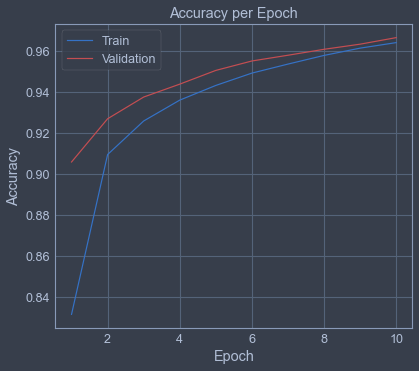

In [27]:
plt.plot([None] + hist.history["accuracy"], 'b')
plt.plot([None] + hist.history["val_accuracy"], 'r')
plt.legend(["Train", "Validation"])
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

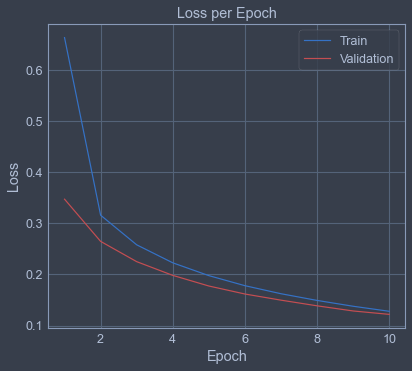

In [28]:
plt.plot([None] + hist.history["loss"], 'b')
plt.plot([None] + hist.history["val_loss"], 'r')
plt.legend(["Train", "Validation"])
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")